In [ ]:
import os
import pandas as pd
import numpy as np

#data_dir = '/kaggle/input/bearing-dataset/2nd_test/2nd_test'
data_dir = r"C:\Users\sruthi\OneDrive\Desktop\GRE\Documents\ASU\Semester 2\CSE 572\Project\IMS\IMS\2nd_test\2nd_test"
data_frames = []  # List to store individual DataFrames

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

# Concatenate the list of DataFrames into a single DataFrame
merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [3]:
# transform index to datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.to_csv('merged_Dataset_BearingTest_2.csv')
merged_data.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


In [24]:
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [5]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

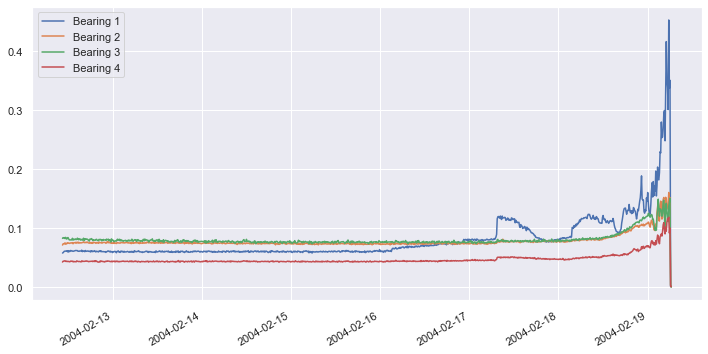

In [6]:
merged_data.plot(figsize = (12, 6))

# EDA

In [9]:
#Summary statistics of the merged_data
print(np.mean(merged_data, axis=0))
print(np.std(merged_data, axis=0))
print(np.min(merged_data, axis=0))
print(np.max(merged_data, axis=0))

Bearing 1    0.080905
Bearing 2    0.078532
Bearing 3    0.081356
Bearing 4    0.047822
dtype: float64
Bearing 1    0.040151
Bearing 2    0.011773
Bearing 3    0.011590
Bearing 4    0.009536
dtype: float64
Bearing 1    0.001168
Bearing 2    0.000767
Bearing 3    0.000716
Bearing 4    0.001699
dtype: float64
Bearing 1    0.453335
Bearing 2    0.161016
Bearing 3    0.151299
Bearing 4    0.119047
dtype: float64


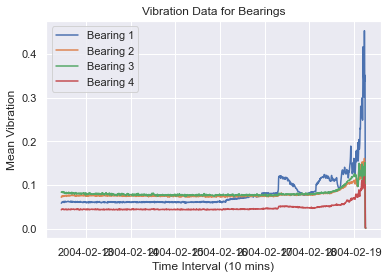

In [14]:
#Plotting the data for vizualization purpose
import matplotlib.pyplot as plt

# Assuming your DataFrame has 4 columns, one for each bearing
for i in range(4):  # Loop through each column (bearing)
    plt.plot(merged_data.iloc[:, i], label=f'Bearing {i + 1}')

plt.xlabel('Time Interval (10 mins)')
plt.ylabel('Mean Vibration')
plt.title('Vibration Data for Bearings')
plt.legend()
plt.show()


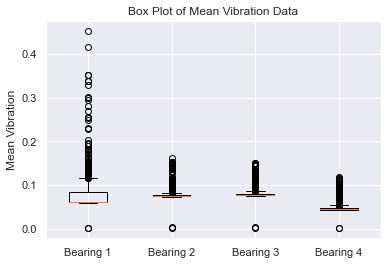

In [15]:
#Box plot to understand the outliers- it is observed that Bearing 1 has the maximum number of outliers
plt.boxplot(merged_data)
plt.xticks([1, 2, 3, 4], ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4'])
plt.ylabel('Mean Vibration')
plt.title('Box Plot of Mean Vibration Data')
plt.show()


In [24]:
#outlier identification using z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(merged_data))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {np.sum(outliers)}")


Number of outliers: 42


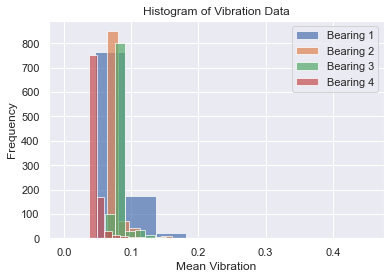

In [18]:
for i in range(4):
    plt.hist(merged_data.iloc[:, i], alpha=0.7, label=f'Bearing {i + 1}')

plt.xlabel('Mean Vibration')
plt.ylabel('Frequency')
plt.title('Histogram of Vibration Data')
plt.legend()
plt.show()


In [19]:
#printing the correlation values to understnd how the mean vibration values from each of bearings are corelated
print(merged_data.corr())

           Bearing 1  Bearing 2  Bearing 3  Bearing 4
Bearing 1   1.000000   0.887936   0.807630   0.945133
Bearing 2   0.887936   1.000000   0.965274   0.963396
Bearing 3   0.807630   0.965274   1.000000   0.907867
Bearing 4   0.945133   0.963396   0.907867   1.000000


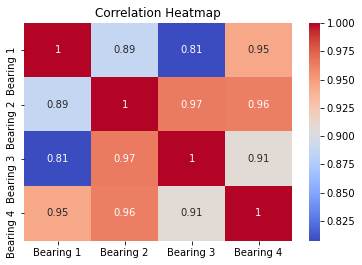

In [19]:
import seaborn as sns

'''
Findings: The strong correlation between bearings 2, 3 & 4 suggests that the vibration pattern of these might be influenced
by similar conditions and we can validate this with other test sets.
'''

sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Feature Extraction

In [25]:
#Statistical features for each bearings
'''
Findings: The high skew & kurtosis values of both bearings 1 & 4 indicates that there might be some anomalies in those
bearings a and we should pay close attention to those while analysing further
'''

def extract_statistical_features(df):
    features = pd.DataFrame()
    features['mean'] = merged_data.mean(axis=0)
    features['std'] = merged_data.std(axis=0)
    features['skew'] = merged_data.skew(axis=0)
    features['kurtosis'] = merged_data.kurtosis(axis=0)
    features['max'] = merged_data.max(axis=0)
    features['min'] = merged_data.min(axis=0)
    features['range'] = features['max'] - features['min']
    return features

stat_features = extract_statistical_features(merged_data)
print(stat_features)


               mean       std      skew   kurtosis       max       min  \
Bearing 1  0.080905  0.040171  4.187934  24.727763  0.453335  0.001168   
Bearing 2  0.078532  0.011779  3.106714  19.736684  0.161016  0.000767   
Bearing 3  0.081356  0.011596  2.484647  15.261315  0.151299  0.000716   
Bearing 4  0.047822  0.009541  3.729213  20.338313  0.119047  0.001699   

              range  
Bearing 1  0.452167  
Bearing 2  0.160249  
Bearing 3  0.150583  
Bearing 4  0.117349  


# Normalizing the data

In [7]:
# Normalize the data before applying FFT
# Z-score normalization
merged_data_normalized = merged_data.apply(lambda x: (x - x.mean()) / x.std())

# Then perform FFT as you did earlier


In [8]:
#Frequency domain feature extraction
import numpy as np
import pandas as pd
from scipy.fft import fft

# Perform FFT and extract frequency domain features
def extract_frequency_features(df):
    n = merged_data_normalized.shape[0]  # Number of time steps
    fft_features = pd.DataFrame()

    for i in range(merged_data_normalized.shape[1]):  # Loop through each column (bearing)
        # Perform FFT on each bearing's data
        fft_result = fft(merged_data_normalized.iloc[:, i].values)  # Ensure we pass a 1D numpy array
        # Get the magnitude of the FFT coefficients (absolute value)
        magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
        peak_frequency = np.argmax(magnitude)  # Find the peak frequency
        fft_features[f'peak_frequency_bearing_{i+1}'] = [peak_frequency]

    return fft_features

# Assuming 'merged_data' is your DataFrame with vibration data
fft_features = extract_frequency_features(merged_data)
print(fft_features)


   peak_frequency_bearing_1  peak_frequency_bearing_2  \
0                         1                         1   

   peak_frequency_bearing_3  peak_frequency_bearing_4  
0                         1                         1  


# calculating the peak frequencies in each of the bearings without using any filters

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

# Define the sampling rate
sampling_rate = 20000  # 20 kHz

# Function to extract peak frequency from each bearing
def extract_peak_frequency(signal, fs):
    n = len(signal)
    # Convert the signal to a NumPy array
    signal = signal.to_numpy()  # Fix for AttributeError
    # Perform FFT
    fft_result = fft(signal)
    # Get the magnitude of the FFT coefficients
    magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
    # Find the index of the maximum magnitude (ignoring the DC component)
    peak_index = np.argmax(magnitude[1:]) + 1
    # Convert the index to the actual frequency
    peak_frequency = (peak_index * fs) / n
    return peak_frequency

# Extract peak frequencies for each bearing
peak_frequencies = {}

for i in range(4):  # Loop through each bearing
    signal = merged_data.iloc[:, i]
    peak_frequencies[f'Bearing_{i+1}'] = extract_peak_frequency(signal, sampling_rate)

# Display the peak frequencies
print("Peak Frequencies (in Hz) for Each Bearing:")
print(peak_frequencies)


Peak Frequencies (in Hz) for Each Bearing:
{'Bearing_1': 20.32520325203252, 'Bearing_2': 20.32520325203252, 'Bearing_3': 20.32520325203252, 'Bearing_4': 20.32520325203252}


# calculating the peak frequencies in each of the bearings using a band-pass filter

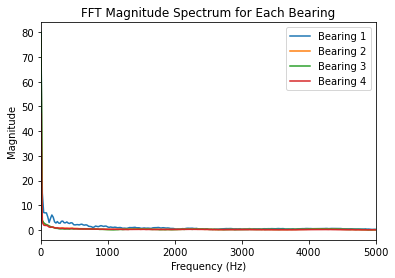

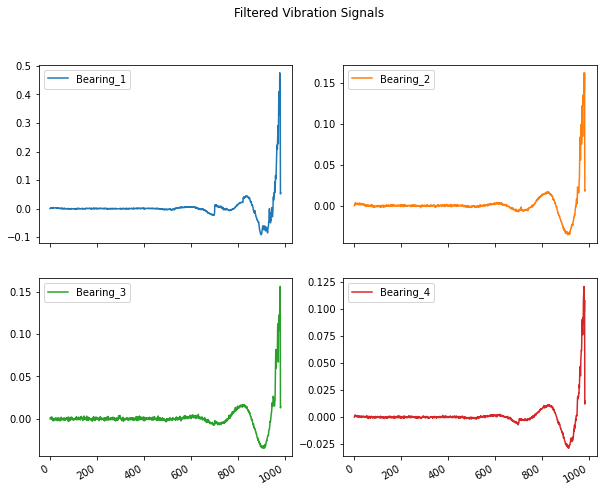

   peak_frequency_bearing_1  peak_frequency_bearing_2  \
0                       0.0                       0.0   

   peak_frequency_bearing_3  peak_frequency_bearing_4  
0                       0.0                       0.0  


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

sampling_rate = 20000  # 20 kHz
n = merged_data.shape[0]
frequencies = np.linspace(0, sampling_rate / 2, n // 2)

# Plot FFT magnitude spectrum for each bearing to analyze any low-frequency dominance
for i in range(4):
    signal = merged_data.iloc[:, i].to_numpy()
    fft_result = fft(signal)
    magnitude = np.abs(fft_result[:n // 2])
    plt.plot(frequencies, magnitude, label=f'Bearing {i+1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude Spectrum for Each Bearing')
plt.legend()
plt.xlim(0, 5000)  # Limit to 5 kHz for a closer look
plt.show()


from scipy.signal import butter, filtfilt

# Define the band-pass filter with corrected cutoff values
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency (10,000 Hz for 20 kHz sampling rate)
    low = lowcut / nyquist
    high = highcut / nyquist
    if not (0 < low < 1) or not (0 < high < 1):
        raise ValueError(f"Cutoff frequencies must be between 0 and Nyquist frequency ({nyquist} Hz)."
                         f" Received: lowcut={lowcut}, highcut={highcut}")
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Define valid cutoff frequencies
lowcut = 100    # Lower cutoff (e.g., 100 Hz)
highcut = 9500  # Upper cutoff (slightly below Nyquist to avoid boundary issues)
sampling_rate = 20000  # 20 kHz

# Apply the filter
filtered_data = pd.DataFrame()
for i in range(4):
    bearing_data = merged_data.iloc[:, i]
    filtered_data[f'Bearing_{i+1}'] = bandpass_filter(bearing_data, lowcut, highcut, sampling_rate)

# Plot the filtered data
filtered_data.plot(subplots=True, layout=(2, 2), figsize=(10, 8), title='Filtered Vibration Signals')
plt.show()


from scipy.fft import fft

# Perform FFT and extract frequency domain features
def extract_frequency_features(df, sampling_rate):
    n = df.shape[0]  # Number of time steps (samples)
    fft_features = pd.DataFrame()

    for i in range(4):  # Loop through each bearing
        # Convert the column to a NumPy array
        signal = df.iloc[:, i].to_numpy()
        # Perform FFT on each bearing's data
        fft_result = fft(signal)
        # Get the magnitude of the FFT coefficients (absolute value)
        magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
        # Calculate the peak frequency index
        peak_frequency_idx = np.argmax(magnitude)
        # Convert peak frequency index to actual frequency in Hz
        peak_frequency = (peak_frequency_idx / n) * sampling_rate
        fft_features[f'peak_frequency_bearing_{i+1}'] = [peak_frequency]

    return fft_features

# Define sampling rate
sampling_rate = 20000  # 20 kHz

# Extract FFT features
fft_features = extract_frequency_features(merged_data, sampling_rate)
print(fft_features)



# calculating the variance in the original vibration data for each of the bearings

In [17]:
print(merged_data.var())


Bearing 1    0.001614
Bearing 2    0.000139
Bearing 3    0.000134
Bearing 4    0.000091
dtype: float64


# Calculating the peak frequencies in each of the bearings using a High-Pass filter

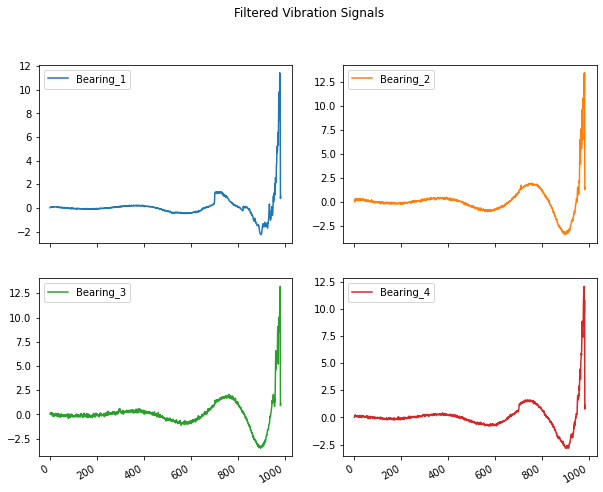

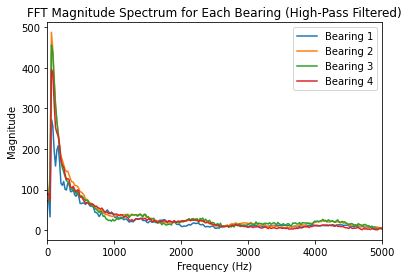

   peak_frequency_bearing_1  peak_frequency_bearing_2  \
0                  60.97561                  60.97561   

   peak_frequency_bearing_3  peak_frequency_bearing_4  
0                  60.97561                  60.97561  


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt

# Define the high-pass filter
def high_pass_filter(data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency (10,000 Hz for 20 kHz sampling rate)
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Define sampling rate and cutoff frequency for high-pass filter
sampling_rate = 20000  # 20 kHz
cutoff_freq = 50  # Set a suitable cutoff frequency (e.g., 50 Hz)

# Apply the high-pass filter to the normalized data (merged_data_normalized)
filtered_data = pd.DataFrame()

# Using the merged_data_normalized instead of merged_data
for i in range(4):
    bearing_data = merged_data_normalized.iloc[:, i]  # Accessing normalized data
    filtered_data[f'Bearing_{i+1}'] = high_pass_filter(bearing_data, cutoff_freq, sampling_rate)

# Plot the filtered data to inspect the results
filtered_data.plot(subplots=True, layout=(2, 2), figsize=(10, 8), title='Filtered Vibration Signals')
plt.show()

# Plot FFT magnitude spectrum for each bearing to analyze any low-frequency dominance
n = filtered_data.shape[0]
frequencies = np.linspace(0, sampling_rate / 2, n // 2)

for i in range(4):
    signal = filtered_data.iloc[:, i].to_numpy()
    fft_result = fft(signal)
    magnitude = np.abs(fft_result[:n // 2])
    plt.plot(frequencies, magnitude, label=f'Bearing {i+1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude Spectrum for Each Bearing (High-Pass Filtered)')
plt.legend()
plt.xlim(0, 5000)  # Limit to 5 kHz for a closer look
plt.show()

# Perform FFT and extract frequency domain features from the filtered data
def extract_frequency_features(df, sampling_rate):
    n = df.shape[0]  # Number of time steps (samples)
    fft_features = pd.DataFrame()

    for i in range(4):  # Loop through each bearing
        # Convert the column to a NumPy array
        signal = df.iloc[:, i].to_numpy()
        # Perform FFT on each bearing's data
        fft_result = fft(signal)
        # Get the magnitude of the FFT coefficients (absolute value)
        magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
        # Calculate the peak frequency index
        peak_frequency_idx = np.argmax(magnitude)
        # Convert peak frequency index to actual frequency in Hz
        peak_frequency = (peak_frequency_idx / n) * sampling_rate
        fft_features[f'peak_frequency_bearing_{i+1}'] = [peak_frequency]

    return fft_features

# Extract FFT features from the high-pass filtered data
fft_features = extract_frequency_features(filtered_data, sampling_rate)
print(fft_features)


# wavelet

# Wavelet Transformation where decomposition level is 4 and hence the number of rows that we get as output is way lesser than that of the original number of samples

In [20]:
import pywt
import numpy as np
import pandas as pd

# Assume 'merged_data_normalized' is your DataFrame containing normalized vibration data

def extract_wavelet_features(df):
    wavelet_features = pd.DataFrame()

    for i in range(4):  # Loop through each bearing
        signal = merged_data_normalized.iloc[:, i].to_numpy()
        
        # Perform Discrete Wavelet Transform (DWT) - Decompose into 4 levels (can adjust level based on need)
        coeffs = pywt.wavedec(signal, 'db4', level=4)  # 'db4' is Daubechies wavelet with 4 taps
        
        # Extract features from wavelet coefficients (e.g., energy, mean)
        features = []
        for coeff in coeffs:
            energy = np.sum(coeff**2)  # Energy of the wavelet coefficients
            mean = np.mean(coeff)     # Mean of the wavelet coefficients
            features.extend([energy, mean])
        
        # Store features for each bearing
        wavelet_features[f'Bearing_{i+1}_wavelet'] = features

    return wavelet_features

# Extract wavelet features for the normalized data
wavelet_features = extract_wavelet_features(merged_data_normalized)

# Display the extracted features
print(wavelet_features)
wavelet_features

   Bearing_1_wavelet  Bearing_2_wavelet  Bearing_3_wavelet  Bearing_4_wavelet
0         813.486202        1119.232059        1160.361526         958.371345
1          -0.170499          -0.463083          -0.288696          -0.354081
2         176.163273         152.165029         101.749157         217.874132
3          -0.019566          -0.010116          -0.004590          -0.018155
4          60.158826         112.735649          91.991425         123.849268
5           0.005007           0.012638           0.016265           0.005361
6          89.607144         152.541972         189.965418          67.700725
7          -0.001778          -0.013102          -0.002058          -0.005880
8          41.397525          96.052120          95.977653          55.121522
9          -0.002314           0.008439          -0.001000           0.003732


# Wavelet Transformation where decomposition level is 1 and hence the number of rows have been halved as compared to the original rows

In [27]:
import numpy as np
import pandas as pd
import pywt  # For wavelet transform

def wavelet_transform(data, wavelet='db4'):
    coeffs = []
    for i in range(data.shape[1]):  # Loop through each bearing
        signal = data.iloc[:, i].to_numpy()
        # Perform Discrete Wavelet Transform (DWT)
        coeff, _ = pywt.dwt(signal, wavelet)
        coeffs.append(coeff)  # Store the wavelet coefficients for each bearing

    # Ensure that the result is reshaped correctly to match the number of rows in data
    coeff_df = pd.DataFrame(np.array(coeffs).T, columns=[f'Bearing_{i+1}_wavelet' for i in range(data.shape[1])])
    return coeff_df

# Apply wavelet transform to the normalized data
wavelet_features = wavelet_transform(merged_data_normalized)

# Check the shape of the output
print(wavelet_features.shape)  # Should be (984, 4)

# Display first 20 rows to confirm the result
print(wavelet_features.head(10))  # Should display the first 20 rows, not just 10


(495, 4)
   Bearing_1_wavelet  Bearing_2_wavelet  Bearing_3_wavelet  Bearing_4_wavelet
0          -0.677205          -0.481266           0.281692          -0.425807
1          -0.731222          -0.492694           0.365259          -0.448326
2          -0.796177          -0.790565           0.240381          -0.688228
3          -0.764490          -0.599558           0.348119          -0.541316
4          -0.694703          -0.466147           0.301266          -0.413816
5          -0.677836          -0.547205           0.277077          -0.486987
6          -0.677225          -0.449108           0.205474          -0.551553
7          -0.689774          -0.368005           0.308878          -0.537835
8          -0.700586          -0.450833          -0.040124          -0.625806
9          -0.654936          -0.384237          -0.141164          -0.524287


# Post performing Wavelet transformation, using that data to extract features like energy, entropy, skewness, mean and others

In [37]:
'''
Findings: Considering Bearing_4 as an example: The energy values suggest there is a significant variation across the wavelet
scales. However, the entropy values being low suggests periodicity in the signal.
'''


import numpy as np
import pywt
from scipy.stats import skew, kurtosis, entropy
import pandas as pd

def extract_wavelet_features(df):
    # Initialize an empty list to store the feature rows
    all_features = []
    
    # Iterate over each bearing in the DataFrame
    for i in range(4):  # Assuming there are 4 bearings
        signal = df.iloc[:, i].to_numpy()  # Get the signal for each bearing
        
        # Perform Discrete Wavelet Transform (DWT)
        coeffs = pywt.wavedec(signal, 'db4', level=4)
        
        # Initialize list to store features for the current bearing
        features = []
        
        for coeff in coeffs:
            # Calculate statistical features for each coefficient set
            energy = np.sum(coeff**2)
            mean = np.mean(coeff)
            std = np.std(coeff)
            sk = skew(coeff)
            kur = kurtosis(coeff)
            ent = entropy(np.histogram(coeff, bins=10, density=True)[0])
            max_val = np.max(coeff)
            min_val = np.min(coeff)
            range_val = max_val - min_val
            rms = np.sqrt(np.mean(coeff**2))
            
            # Store features for the current coefficient set
            features.extend([energy, mean, std, sk, kur, ent, max_val, min_val, range_val, rms])
        
        # Create a row with the feature names and values for the current bearing
        bearing_features = [
            f'Bearing_{i+1}_{feat}' for feat in ['energy', 'mean', 'std', 'skew', 'kurtosis', 'entropy', 
                                                 'max', 'min', 'range', 'rms'] * len(coeffs)
        ]
        
        # Append the features to the list (keeping track of the feature names)
        all_features.append(features)
    
    # Convert the list of features into a DataFrame
    wavelet_features = pd.DataFrame(all_features, columns=bearing_features)
    
    return wavelet_features

# Assuming 'merged_data_normalized' is your DataFrame with the normalized data for the 4 bearings
wavelet_features = extract_wavelet_features(merged_data_normalized)

# Display the extracted features in a tabular format
print(wavelet_features)


   Bearing_4_energy  Bearing_4_mean  Bearing_4_std  Bearing_4_skew  \
0        813.486202       -0.170499       3.454557        3.558772   
1       1119.232059       -0.463083       4.030490        2.657294   
2       1160.361526       -0.288696       4.120776        1.808055   
3        958.371345       -0.354081       3.737422        3.919192   

   Bearing_4_kurtosis  Bearing_4_entropy  Bearing_4_max  Bearing_4_min  \
0           16.887866           0.867902      20.540018      -2.087116   
1           19.304599           0.697948      23.448003     -15.898960   
2           13.397451           0.765784      21.069723     -16.754054   
3           23.855894           0.869145      23.694296     -10.939808   

   Bearing_4_range  Bearing_4_rms  ...  Bearing_4_energy  Bearing_4_mean  \
0        22.627134       3.458762  ...         41.397525       -0.002314   
1        39.346963       4.057006  ...         96.052120        0.008439   
2        37.823776       4.130876  ...         95.